# Exercise set 9

#### Exercise 1:
##### a)

In [2]:
# plotting things
%matplotlib inline

from numpy import *
from numpy.linalg import norm, solve
from matplotlib.pyplot import *
newparams = {'figure.figsize': (8.0, 4.0), 'axes.grid': True,
             'lines.markersize': 8, 'lines.linewidth': 2,
             'font.size': 14}
rcParams.update(newparams)

We use the code from the Jupyter notebook "Preliminaries" and use the composite Simpson's formula instead of the trapezodial formula

h = 2.00e+00,   T(h) = 0.78346746,   e(h) = 4.77e-02
h = 1.00e+00,   T(h) = 0.73913060,   e(h) = 3.37e-03
h = 5.00e-01,   T(h) = 0.73597650,   e(h) = 2.18e-04
h = 2.50e-01,   T(h) = 0.73577259,   e(h) = 1.37e-05
h = 1.25e-01,   T(h) = 0.73575974,   e(h) = 8.59e-07
h = 6.25e-02,   T(h) = 0.73575894,   e(h) = 5.37e-08
h = 3.12e-02,   T(h) = 0.73575889,   e(h) = 3.36e-09
h = 1.56e-02,   T(h) = 0.73575888,   e(h) = 2.10e-10
h = 7.81e-03,   T(h) = 0.73575888,   e(h) = 1.31e-11
h = 3.91e-03,   T(h) = 0.73575888,   e(h) = 8.19e-13

The order p and the error constant C
h = 1.00e+00,  p = 3.95,  C = 0.0034
h = 5.00e-01,  p = 3.99,  C = 0.0035
h = 2.50e-01,  p = 4.00,  C = 0.0035
h = 1.25e-01,  p = 4.00,  C = 0.0035
h = 6.25e-02,  p = 4.00,  C = 0.0035
h = 3.12e-02,  p = 4.00,  C = 0.0035
h = 1.56e-02,  p = 4.00,  C = 0.0035
h = 7.81e-03,  p = 4.00,  C = 0.0035


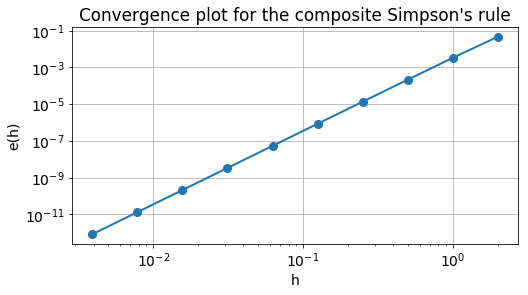

In [23]:
# this is the same function we used in exercise set 8
def simpson(f, a, b, m=10):
    # Find an approximation to an integral by the composite Simpson's method:
    # Input:  
    #   f:    integrand
    #   a, b: integration interval
    #   m:    number of subintervals
    # Output: The approximation to the integral
    n = 2*m
    x_noder = linspace(a, b, n+1)       # equidistributed nodes from a to b 
    h = (b-a)/n                         # stepsize
    S1 = f(x_noder[0]) + f(x_noder[n])  # S1 = f(x_0)+f(x_n)
    S2 = sum(f(x_noder[1:n:2]))         # S2 = f(x_1)+f(x_3)+...+f(x_m)
    S3 = sum(f(x_noder[2:n-1:2]))       # S3 = f(x_2)+f(x_4)+...+f(x_{m-1})
    S = h*(S1 + 4*S2 + 2*S3)/3
    return S

# use the function xe^x
def f(x):
    return x*exp(x)

a, b = -1, 1                     # integration interval
exact = 2/e

# The below code is the same as in the notebook., but "trapezodial"
# is changed to "simpson". It is also made into a function of f
# to make it easy to repeat the procedure for an other integrand


def compute_plot_error(f, a, b, exact):
    # Find an numerical approximation for different values of h. 
    # Store the stepsize h and the error
    n = 1                           # initial stepsize, h=(b-a) 
    h = (b-a)/n
    steps = []                      # arrays to store stepsizes and errors
    errors = []
    Nmax = 10
    for k in range(Nmax):
        numres = simpson(f, a, b, n)    # Numerical approximation
        eh = abs(exact - numres)            # Error e(h)
        print('h = {:8.2e},   T(h) = {:10.8f},   e(h) = {:8.2e}'.format(h, numres, eh))
        steps.append(h)                     # Append the step to the array
        errors.append(eh)                   # Append the error to the array
        n = 2*n                             # Reduce the stepsize with a factor 2
        h = (b-a)/n

    # Find the order and the error constant
    print('\nThe order p and the error constant C')
    for k in range(1, Nmax-1):
        p = log(errors[k+1]/errors[k])/log(steps[k+1]/steps[k])
        C = errors[k+1]/steps[k+1]**p
        print('h = {:8.2e},  p = {:4.2f},  C = {:6.4f}'.format(steps[k], p, C))
    
    # Make an error plot
    clf()
    loglog(steps, errors, 'o-') # plot logarithmic scale
    xlabel('h')
    ylabel('e(h)')
    title('Convergence plot for the composite Simpson\'s rule')
    grid(True)

compute_plot_error(f, a, b, exact)

##### b)

Use the ``compute_plot_error`` function from (a) with $f(x) = \sqrt{1-x^2}e^x$.

h = 2.00e+00,   T(h) = 1.33333333,   e(h) = 4.42e-01
h = 1.00e+00,   T(h) = 1.63540364,   e(h) = 1.40e-01
h = 5.00e-01,   T(h) = 1.72886020,   e(h) = 4.66e-02
h = 2.50e-01,   T(h) = 1.75945841,   e(h) = 1.60e-02
h = 1.25e-01,   T(h) = 1.76989907,   e(h) = 5.60e-03
h = 6.25e-02,   T(h) = 1.77353123,   e(h) = 1.97e-03
h = 3.12e-02,   T(h) = 1.77480571,   e(h) = 6.94e-04
h = 1.56e-02,   T(h) = 1.77525467,   e(h) = 2.45e-04
h = 7.81e-03,   T(h) = 1.77541312,   e(h) = 8.66e-05
h = 3.91e-03,   T(h) = 1.77546909,   e(h) = 3.06e-05

The order p and the error constant C
h = 1.00e+00,  p = 1.59,  C = 0.1401
h = 5.00e-01,  p = 1.54,  C = 0.1356
h = 2.50e-01,  p = 1.52,  C = 0.1316
h = 1.25e-01,  p = 1.51,  C = 0.1290
h = 6.25e-02,  p = 1.50,  C = 0.1274
h = 3.12e-02,  p = 1.50,  C = 0.1265
h = 1.56e-02,  p = 1.50,  C = 0.1260
h = 7.81e-03,  p = 1.50,  C = 0.1257


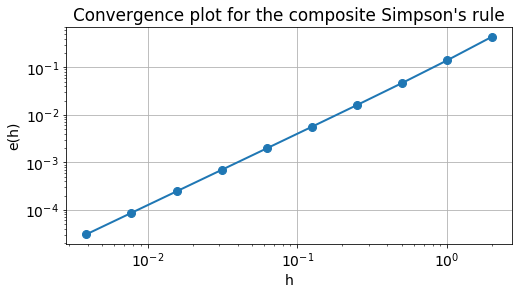

In [24]:
def f(x):
    return sqrt(1-x**2)*e**x

a = -1
b = 1
exact = 1.7754996892121809469

compute_plot_error(f, a, b, exact)

Here we only have convergence rate 1.5, which is much lower than 4. Let's plot the integrand to see what the problem is:

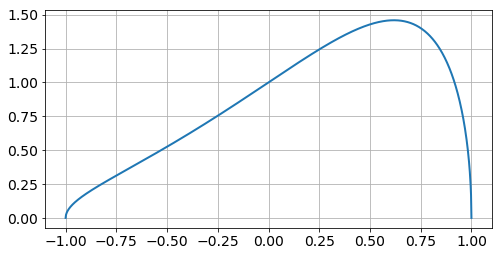

In [25]:
x = linspace(-1, 1, 1001)
plot(x, f(x))

For the error estimate to hold, we must have $f \in C^4[-1, 1]$ (see the theorem about error in Simpson's rule). We see that the derivative goes to infinity when we approach $1$, so the function is not differentiable in $1$. Thus, we do not expect correct convergence rate for this interval. However, if we restrict the interval so the function is four time differentiable on the whole interval, we expect a convergence rate of $4$.

If we want to compute the integral on this whole interval, we must incorporate the singular points (i.e. the points where the function goes to infinity) in the veight function of our quadrature rule. Exercise 2 explains how this can be done in practice. 

#### Exercise 2:
##### a)

Remember the theorems we had about existence and uniqueness of zeros of a functions, described in the notes about nonlinear equations.

If we can show that $f(1)$ and $f(2)$ has opposite signs, and that the derivative of $f$ in $[1, 2]$ is strictly increasing or decreasing (depending on the sign), then we know that there must be a unique solution.

We have $f(1) = e^1 + 1 - 1 - 4 < 0$ and $f(2) = e^2 + 4 - 2 - 4 > 0$. Thus there must be a zero in the interval $[1, 2]$. The derivative is given by $f'(x) = e^x + 2x - 1$. We must prove that this is always positive in $[1, 2]$, i.e. $e^x + 2x -1 > 0$. But as $x$ is always positive in $[1,2]$, the lowest possible value ue at $x=1$, which gives $f'(x) = e^1 + 2 - 1 > 0$.

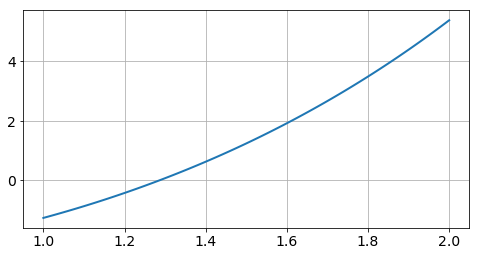

In [26]:
def f(x):
    return e**x + x**2 - x - 4

x = linspace(1, 2, 101)
plot(x, f(x))

We see that a reasonable approximation is $x = 1.3$.

Newton's method is given by
$$
x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)}
$$
and for us this will be
$$
x_{k+1} = x_k - \frac{e^{x_k} + x_k^2 - x_k - 4}{e^{x_k} + 2x_k - 1} = \frac{x_ke^{x_k} - e^{x_k} + x_k^2 + 4}{e^{x_k} + 2x_k - 1}
$$

We set $x_0 = 1.3$ as out initial guess. Then

\begin{align*}
x_1 &=  1.3 - \frac{e^{1.3} + 1.3^2 - 1.3 - 4}{e^{1.3} + 2\cdot1.3 - 1} \approx 1.28874\\\\
x_2 &=  1.28874 - \frac{e^{1.28874} + 1.28874^2 - 1.28874 - 4}{e^{1.28874} + 2\cdot1.28874 - 1} \approx 1.28868\\
\end{align*}

By using the ``newton`` function we can do this in a more efficient way:

In [27]:
# from notebook on nonlinear equations
def newton(f, df, x0, tol=1.e-8, max_iter=30):
    # Solve f(x)=0 by Newtons method
    # The output of each iteration is printed
    # Input:
    #   f, df:   The function f and its derivate f'.
    #   x0:  Initial values
    #   tol: The tolerance
    # Output:
    #   The root and the number of iterations
    x = x0
    print('k ={:3d}, x = {:18.15f}, f(x) = {:10.3e}'.format(0, x, f(x)))
    for k in range(max_iter):
        fx = f(x)
        if abs(fx) < tol:           # Accept the solution 
            break 
        x = x - fx/df(x)            # Newton-iteration
        print('k ={:3d}, x = {:18.15f}, f(x) = {:10.3e}'.format(k+1, x, f(x)))
    return x, k+1

# use this on our problem

def f(x):
    return e**x + x**2 - x - 4

def df(x):
    return e**x + 2*x - 1

x0 = 1.3

newton(f, df, x0)

k =  0, x =  1.300000000000000, f(x) =  5.930e-02
k =  1, x =  1.288746758560088, f(x) =  3.581e-04
k =  2, x =  1.288677969382023, f(x) =  1.332e-08
k =  3, x =  1.288677966823869, f(x) =  0.000e+00


(1.2886779668238686, 4)

We see that we get quadratic convergence, since we double the number of correct digits in each iteration (look at the value f(x)).

##### b)

In [9]:
# from notebook
def fixpoint(g, x0, tol=1.e-8, max_iter=30):
    # Solve x=g(x) by fixed point iterations
    # The output of each iteration is printed
    # Input:
    #   g:   The function g(x)
    #   x0:  Initial values
    #   tol: The tolerance
    # Output:
    #   The root and the number of iterations
    x = x0
    print('k ={:3d}, x = {:14.10f}'.format(0, x))  
    for k in range(max_iter):        
        x_old = x                        # Store old values for error estimation 
        x = g(x)                         # The iteration
        err = abs(x-x_old)               # Error estimate
        print('k ={:3d}, x = {:14.10f}'.format(k+1, x))
        if err < tol:          # The solution is accepted 
            break
    return x, k+1

# make the different choices of g
# NB: remember that these choices must satisfy f(x) = 0 => g(x) = x
def g1(x):
    return log(4 + x - x**2)

def g2(x):
    return sqrt(-e**x + x + 4)

def g3(x):
    return e**x + x**2 - 4

x0 = 1.5
for g in g1, g2, g3:
    print("g = %s:" % g.__name__)
    fixpoint(g, x0, max_iter=4)

g = g1:
k =  0, x =   1.5000000000
k =  1, x =   1.1786549963
k =  2, x =   1.3322149248
k =  3, x =   1.2690350905
k =  4, x =   1.2970764687
g = g2:
k =  0, x =   1.5000000000
k =  1, x =   1.0091139329
k =  2, x =   1.5053054929
k =  3, x =   0.9998878264
k =  4, x =   1.5105995169
g = g3:
k =  0, x =   1.5000000000
k =  1, x =   2.7316890703
k =  2, x =  18.8209324059
k =  3, x = 149220368.2729533017


OverflowError: (34, 'Result too large')

We see that it seems that the first choice of $g$ converges. The second choice however oscilates between values on each side of the zero, but it does not get closer to the correct answer. The third choice is very bad, and seems to go to infitity (and very fast), giving overflow in only four iterations.

##### c)

The assumptions in the fixed point theorem are:

There is an interval $[a,b]$ such that
* $g\in C^1[a,b]$
* there exist a positive constant $L<1$ such that $|g'(x)|\leq L <1$ for all $x\in[a,b]$
* $g([a,b])\subset (a,b)$

For all the choices of $g$ we see that they are differentiable (at least near the fixed point). 

To prove convergence, wee need to find an interval $[a,b]$ around $r$, for which the two other conditions are satisfied. To find this, you may try around a bit before you find a suitable interval. 

Check the second condition: 

\begin{align*}
g_1(x) &= \ln(4+x-x^2), & g_1'(x) &= \frac{2x-1}{x^2-x-4}, \\
g_2(x) &= \sqrt{-e^x+x+4}, & g_2'(x) &= \frac{1-e^x}{2\sqrt{-e^x+x+4}}, \\
g_3(x) &= e^x+x^2-4, & g_3'(x) &= e^x+2x.
\end{align*}

Clearly, $|g_3'(x)|>1$, so convergence of scheme 3 towards the fixed point around 1.3 will never happen. 

Plot the derivative $g'(x)$ over the interval $[1,2]$. 

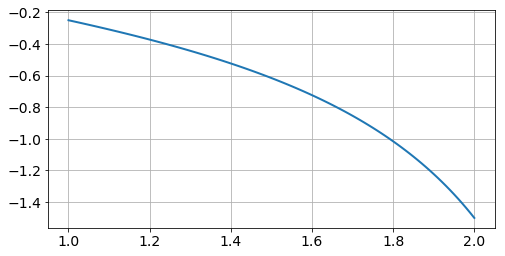

In [11]:
x = linspace(1,2,101)
dg1 = (2*x-1)/(x**2-x-4)
plot(x, dg1)

The condition $|g'(x)|<1$ on the interval is not satisfied, so the fixed point theorem can not directly be used. But the condition is satisfied on the interval $[1,1.7]$.

To see if this is the case, plot $g_1(x)$ for on the interval $[1,1.7]$, 

1.03318448335 1.38629436112


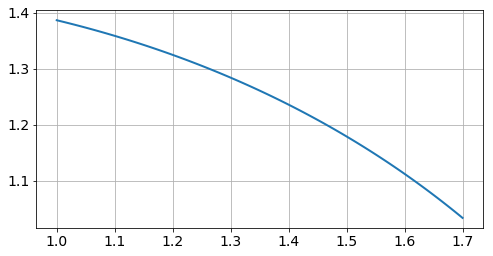

In [15]:
x = linspace(1,1.7,101)
plot(x, g1(x)) 
print(min(g1(x)),max(g1(x)))

Which shows that $g(1,1.7) \subset [1.033, 1.387]$. All the conditions of the fixed point theorem are satisfied and convergence is guaranteed for all $x_0\in [1,1.7]$. Notice that even if you choose a starting value outside this interval, it may happen that $x_1$ will be in an interval for which convergence can be proved. And we have not discussed if the interval can be extended below $1$. 

For $g_2(x)$: The first thing you probably noticed is that $-e^x+x+4$ becomes negative for $x$ too large, more specific for $x>1.749$, so for the interval $[1,2]$ not even the first condition is satisfied. 
So let us see how $g_2'(x)$ behaves on some smaller interval, for instance $[1,1.5]$. 

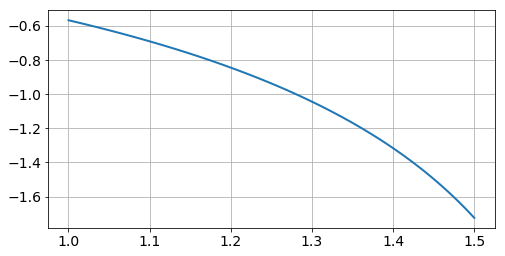

In [25]:
x = linspace(1,1.5,101)
dg2 = (1-exp(x))/2/sqrt(-exp(x)+x+4)
plot(x,dg2)

It seems that the second condition of the fixed point theorem do not hold on this interval. To see if it is at all possible to find an interval around $r$ for which both conditions are satisfied, let us cheat a bit and use the result from point \textbf{a)}, $r=1.2886779668238686$, and calculate $g_2'(r)$:

In [28]:
r=1.2886779668238686
print((1-exp(r))/2/sqrt(-exp(r)+r+4))

-1.01964460179


This is greater than 1 in absolute value, and convergence can never be obtained.

#### Exercise 3:
##### a)

Since $r$ is a fixed point, we have $g(r) = r$.
But then $g^{-1}(r) =  g^{-1}(g(r)) = r $
so $r$ is a fixed point of the inverse of $g$.

##### b)

Let $h = g^{-1}(g(x)) = x$. Then
$$
\frac{d}{dx}h(x) = 1
$$
and also, using the chain rule,
$$
\frac{d}{dx}h(x) = g'(x) (g^{-1})'(g(x)).
$$
At the point $x=r$ we get
\begin{align*}
g'(r) (g^{-1})'(g(r)) &= 1\\
g'(r) (g^{-1})'(r) &= 1.
\end{align*}
If $g'(r) > 1$, then $(g^{-1})'(r) < 1$ for the product to be $1$.

##### c)

We use (a) and the fact that $\arccos$ is the inverse of $\cos$. Then, if we can find an interval $(a,b)$ where $\frac{d}{dx}\arccos(x) > 1$, we see from (b) that $\frac{d}{dx}\cos(x) < 1$. Then by the fixed point theorem the fixed point iterations will converge in this interval.

We know that $\frac{d}{dx}\arccos(x) = -\frac{1}{1-x^2}$, and see that the absolute value of this is greater than $1$ for $x$ except for $0$.  Thus, we can for example choose the interval $[0.25, 0.75]$.

We can now use the ``fixpoint`` method with $f(x)=cos(x)$ and $x_0 \in [0.25, 0.75]$:

In [102]:
def g(x):
    return cos(x)

x0 = 0.3

fixpoint(g, x0, max_iter=20)

k =  0, x =   0.3000000000
k =  1, x =   0.9553364891
k =  2, x =   0.5773340445
k =  3, x =   0.8379206831
k =  4, x =   0.6690097308
k =  5, x =   0.7844362247
k =  6, x =   0.7077866473
k =  7, x =   0.7598027553
k =  8, x =   0.7249718828
k =  9, x =   0.7485180672
k = 10, x =   0.7326982079
k = 11, x =   0.7433723391
k = 12, x =   0.7361904364
k = 13, x =   0.7410319366
k = 14, x =   0.7377723433
k = 15, x =   0.7399688072
k = 16, x =   0.7384895913
k = 17, x =   0.7394861663
k = 18, x =   0.7388149331
k = 19, x =   0.7392671163
k = 20, x =   0.7389625350


(0.7389625349821303, 20)

We can check if this is correct:

In [103]:
print("cos(0.7389625349821303) = % f" % cos(0.7389625349821303))
print("arccos(0.7389625349821303) = % f" % arccos(0.7389625349821303))
print("Correct answer: %f" % 0.73908513321516064166)

cos(0.7389625349821303) =  0.739168
arccos(0.7389625349821303) =  0.739267
Correct answer: 0.739085


Thus, this seems like a reasonable approximation.

#### Exercise 4:
##### a)
Newtons method on systems is on the form

* Solve the system $J(\mathbf{x}_k)\Delta_k = - \mathbf{f}(\mathbf{x}_k)$. 

* Let $\mathbf{x}_{k+1} = \mathbf{x}_k + \Delta_k$.

Thus, we must compute the Jacobian matrix $J(\mathbf{x}_k)$ and $\mathbf{f}(\mathbf{x}_k)$. The Jacobian of this system is given by
$$
J(\mathbf{x})  =
\left( \begin{array}{cc}
2x & 2y \\
y & x
\end{array} \right)
$$
and we have
$$
\mathbf{f}(\mathbf{x}) =
\left(\begin{array}{c}
x^2 + y^2 -4 \\ 
xy -1
\end{array} \right)
$$
Doing one iteration we get
$$
x = 2,\\
y = 0.5
$$
and doing two iterations we get
$$
x = 1.93,\\
y = 0.52
$$


##### b)

In [104]:
set_printoptions(precision=15)          # Output with high accuracy

In [105]:
# function from notebook
def newton_system(f, jac, x0, tol = 1.e-10, max_iter=20):
    x = x0
    print('k ={:3d}, x = '.format(0), x)
    for k in range(max_iter):
        fx = f(x)
        if norm(fx, inf) < tol:          # The solution is accepted. 
            break
        Jx = jac(x)
        delta = solve(Jx, -fx) 
        x = x + delta            
        print('k ={:3d}, x = '.format(k+1), x)
    return x, k

In [117]:
# code for this exercise
def f(x):
    return array([x[0]**2 + x[1]**2 - 4,
                  x[0]*x[1] - 1])
def jac(x):
    return array([[2*x[0], 2*x[1]],
                  [x[1],   x[0]]])

x0 = [2, 0]
newton_system(f, jac, x0, max_iter=10)

k =  0, x =  [2, 0]
k =  1, x =  [2.  0.5]
k =  2, x =  [1.933333333333333 0.516666666666667]
k =  3, x =  [1.931852741096439 0.517637054821929]
k =  4, x =  [1.931851652578934 0.517638090204244]


(array([1.931851652578934, 0.517638090204244]), 4)

##### c)

In [114]:
def f(x):
    return array([x[0]**2 + x[1]**2 - 2,
                  x[0]*x[1] - 1])
def jac(x):
    return array([[2*x[0], 2*x[1]],
                  [x[1],   x[0]]])

x0 = [2, 0]
newton_system(f, jac, x0, max_iter=10)

k =  0, x =  [2, 0]
k =  1, x =  [1.5 0.5]
k =  2, x =  [1.25 0.75]
k =  3, x =  [1.125 0.875]
k =  4, x =  [1.0625 0.9375]
k =  5, x =  [1.03125 0.96875]
k =  6, x =  [1.015625 0.984375]
k =  7, x =  [1.0078125 0.9921875]
k =  8, x =  [1.00390625 0.99609375]
k =  9, x =  [1.001953125 0.998046875]
k = 10, x =  [1.0009765625 0.9990234375]


(array([1.0009765625, 0.9990234375]), 9)

The method seems to work in both cases, but we should note that for the second case there are only two solutions, while for the first there are four. Thus, the starting point will decide which of the point the method will converge towards. 

However, for the first system we have quadratic convergence, while in the second we only have linear convergence.

In order to investigate this further, we know that (see the end of the notes on nonlinear equations) the newton iterations has quadratic convergence if the system is *sufficiently differentiable* and has *nonsingular jacobian at the zero*. Both the systems we consider are infinitly differentiable, so lets compute the determinant of the two jacobians:

In both cases
$$
J(\mathbf{x})  =
\left( \begin{array}{cc}
2x & 2y \\
y & x
\end{array} \right)
$$
so 
$$
det(J_1(\mathbf{x})) = 2x^2 - 2y^2
$$
Inserting the solution for the first system, we find
$$
det(J_1(\mathbf{x})) = 2\cdot1.931851652578934^2 - 2\cdot0.517638090204244^2 \neq 0.
$$
For the second system we get
$$
det(J_1(\mathbf{x})) = 2\cdot1^2 - 2\cdot1^2 = 0.
$$
Thus, the jacobian is singular, and we cannot expect quadratic convergence.